In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
day0 = pd.read_csv("prices_round_4_day_1.csv", sep = ';')
day1 = pd.read_csv("prices_round_4_day_2.csv", sep = ';')
day2 = pd.read_csv("prices_round_4_day_3.csv", sep = ';')

day1["timestamp"] += 1000000
day2["timestamp"] += 2000000

all_data = pd.concat([day0, day1, day2])
all_data = all_data.set_index("timestamp")
all_data

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,1,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
0,1,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
100,1,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
100,1,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
200,1,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999700,3,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0
2999800,3,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0
2999800,3,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0


In [140]:
coconut_mid = all_data[all_data["product"] == "COCONUT"]["mid_price"]
coconut_coup_mid = all_data[all_data["product"] == "COCONUT_COUPON"]["mid_price"]
coconut_spread = all_data[all_data["product"] == "COCONUT"]["ask_price_1"] - all_data[all_data["product"] == "COCONUT"]["bid_price_1"]
coconut_spread.va

timestamp
0          2.0
100        1.0
200        1.0
300        1.0
400        1.0
          ... 
2999500    1.0
2999600    1.0
2999700    1.0
2999800    2.0
2999900    1.0
Length: 30000, dtype: float64

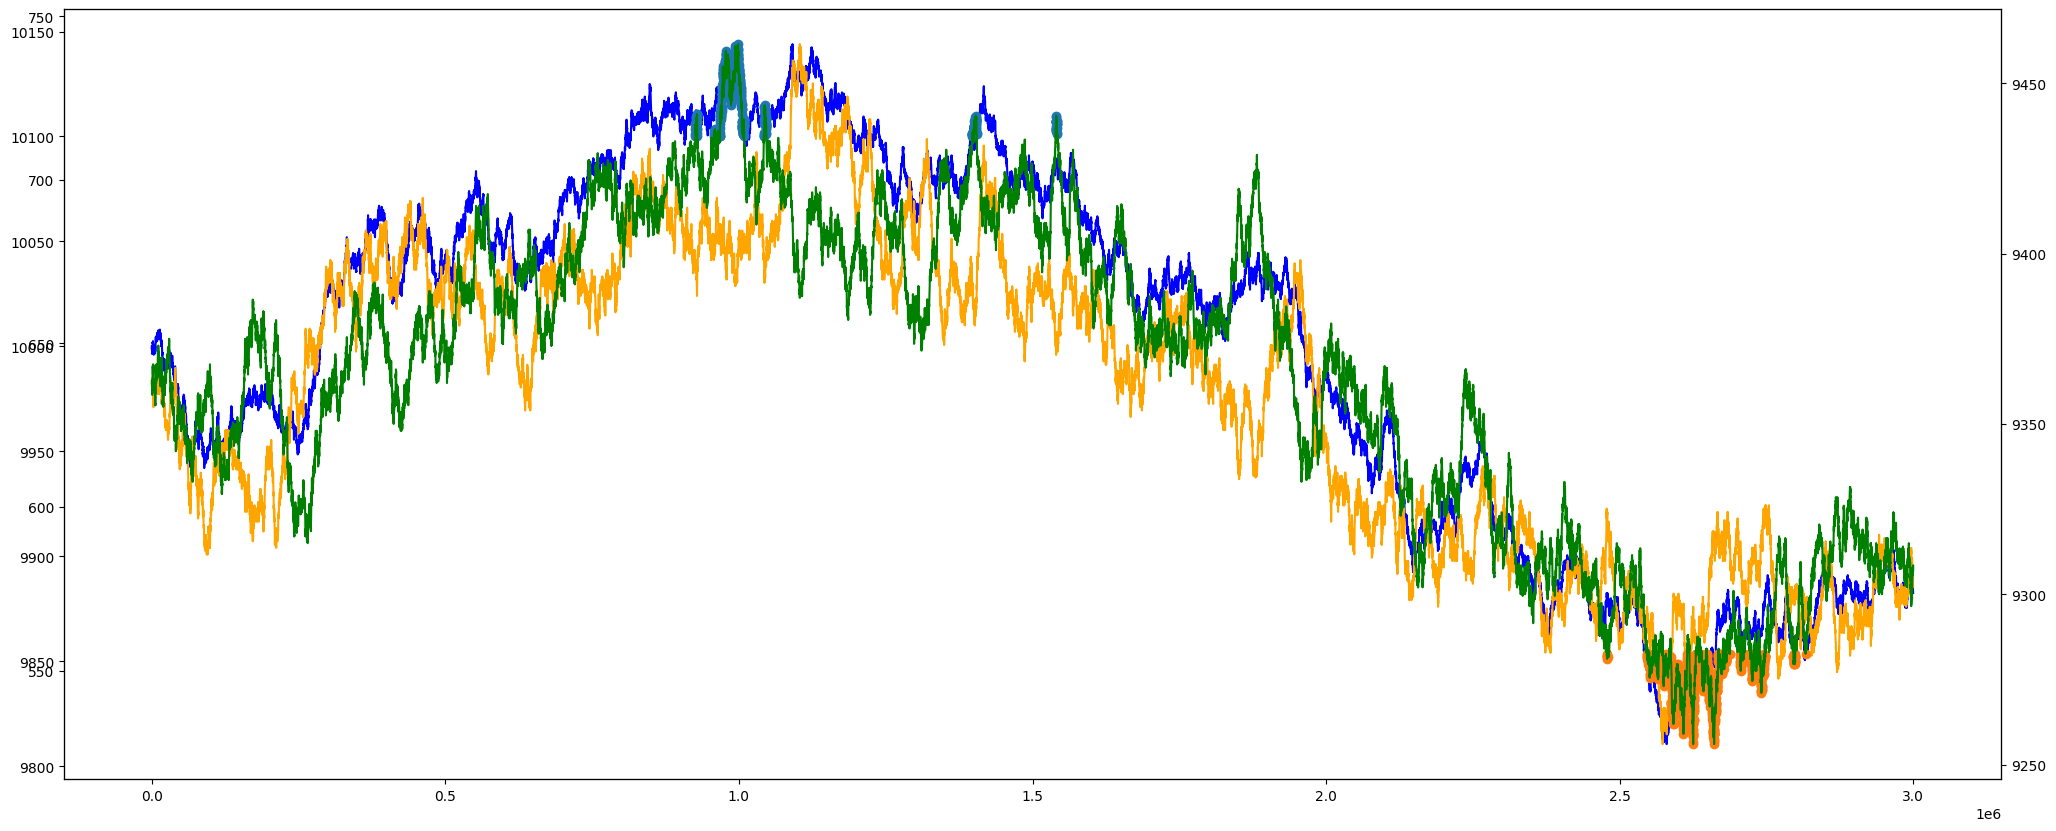

In [133]:
fig, ax1 = plt.subplots(figsize = (25, 10))
ax1.plot(coconut_mid, c = "blue")
ax2 = ax1.twinx()
ax2.plot(coconut_coup_mid, c = "orange")
ax3 = ax2.twinx()
ax3.plot(premium.index, premium.values, c = "green")
ax3.scatter(peaks.index, peaks.values)
ax3.scatter(troughs.index, troughs.values)
plt.show()

In [80]:
premium = abs(coconut_mid - coconut_coup_mid)

In [132]:
peaks = premium[premium > 9434]
troughs = premium[premium < 9283]

<Axes: >

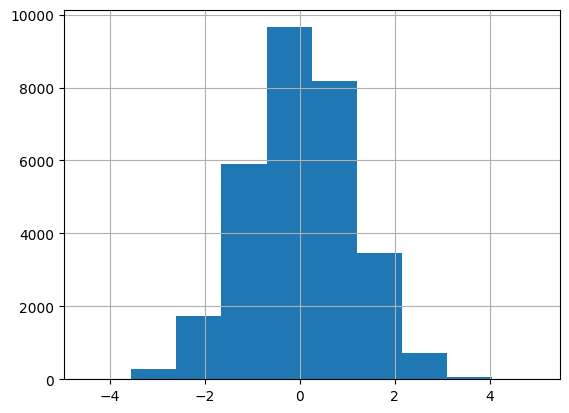

In [27]:
premium.diff().hist()

[9256.  9269.7 9283.4 9297.1 9310.8 9324.5 9338.2 9351.9 9365.6 9379.3
 9393.  9406.7 9420.4 9434.1 9447.8 9461.5]


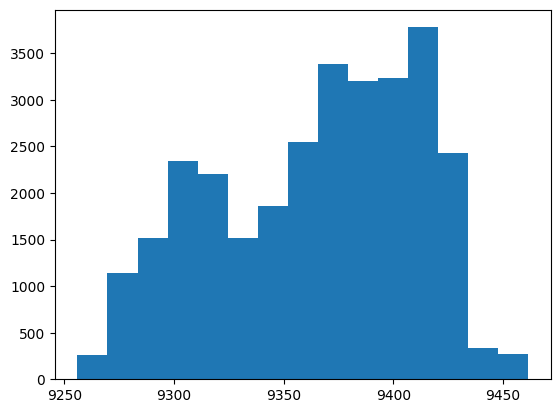

In [129]:
res = plt.hist(premium, bins = 15)
print(res[1])